In [3]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
 # a) Find missing values and replace missing value with suitable alternative
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
# Replace missing values — mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\n Missing Values After Replacement:")
print(df.isnull().sum())


 Missing Values After Replacement:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [22]:
#b) Remove inconsistent dataset 
# Example: age should be > 0, trestbps (resting BP) should be > 0
df = df[(df["age"] > 0) & (df["trestbps"] > 0) & (df["chol"] > 0)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
# c) Boxplot for each numerical attribute
print("\nDrawing boxplots for all numerical columns...")
numerical_cols = df.select_dtypes(include='number').columns



Drawing boxplots for all numerical columns...


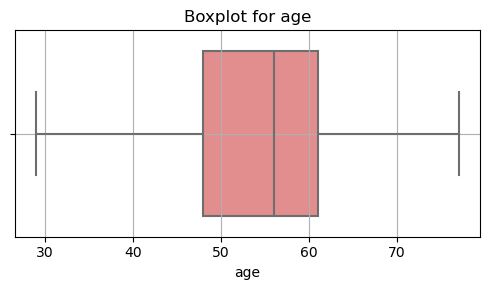

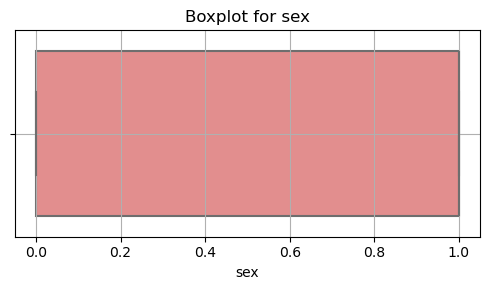

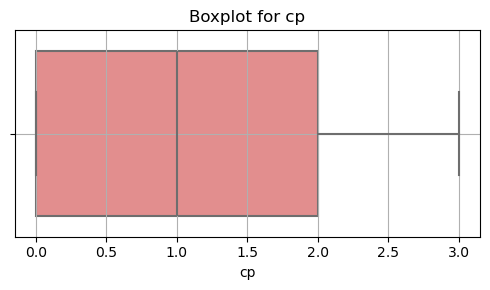

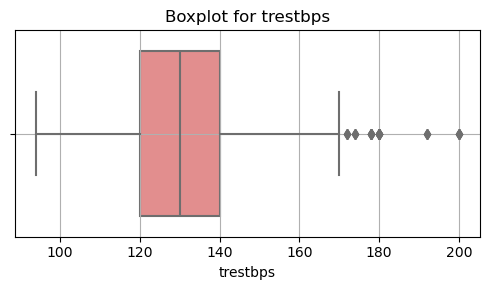

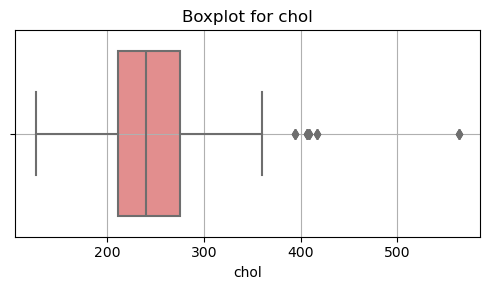

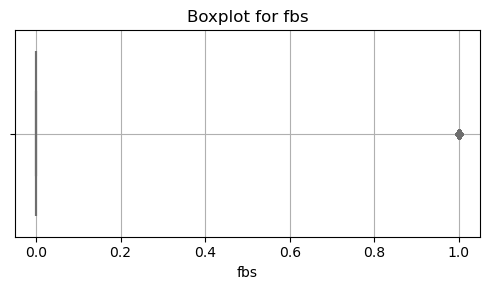

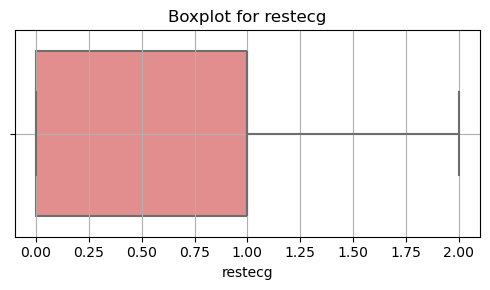

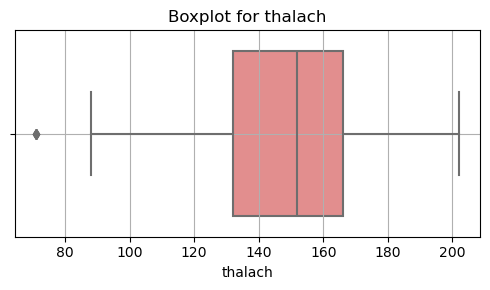

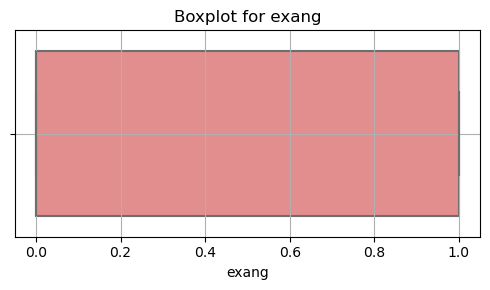

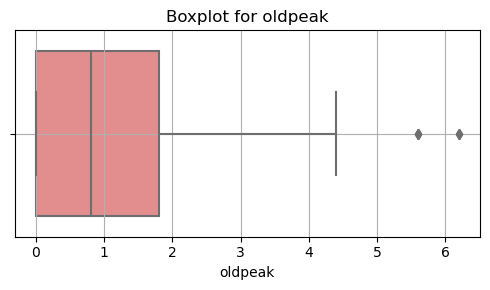

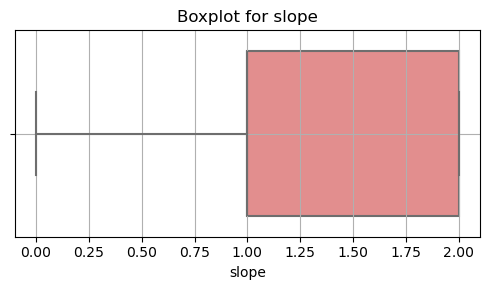

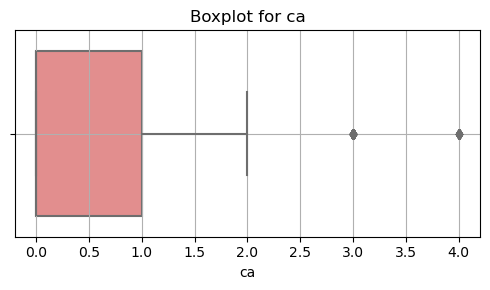

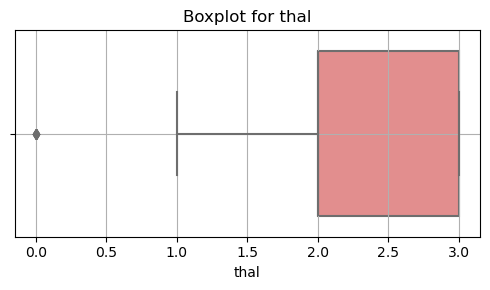

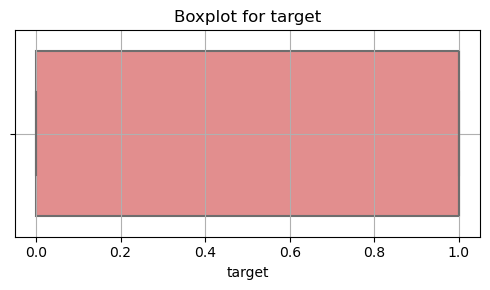

In [36]:
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot for {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 Drawing histograms for 'age' and 'chol'...


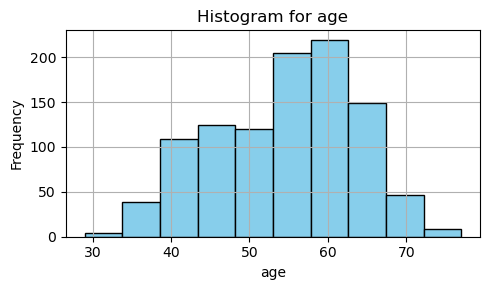

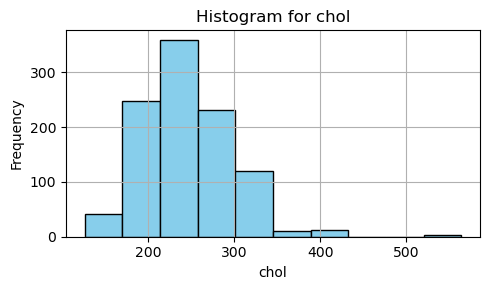

In [44]:
# d) Draw histogram for any 2 attributes
print("\n Drawing histograms for 'age' and 'chol'...")
for col in ['age', 'chol']:
    plt.figure(figsize=(5, 3))
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [45]:
# e) Find data type of each column
print("\n Data Types of Each Column:")
print(df.dtypes)


 Data Types of Each Column:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [47]:
# f) Find out zeros in each column
print("\n Zero Count in Each Column:")
print((df == 0).sum())



 Zero Count in Each Column:
age           0
sex         312
cp          497
trestbps      0
chol          0
fbs         872
restecg     497
thalach       0
exang       680
oldpeak     329
slope        74
ca          578
thal          7
target      499
dtype: int64


In [49]:
# g) Find mean of each numerical column
print("\n Mean of Each Numerical Column:")
print(df[numerical_cols].mean())


 Mean of Each Numerical Column:
age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64


In [50]:
# h) Shape of dataset
print("\n Shape of Dataset:")
print(df.shape)


 Shape of Dataset:
(1025, 14)
